In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from main import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dimas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = pd.read_csv('spam_moderation.csv', names=['label', 'message'])

In [9]:
df.head()

,label,message
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [10]:
df.isnull().sum()

label      0
message    0
dtype: int64


In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
v1         1
Name: count, dtype: int64

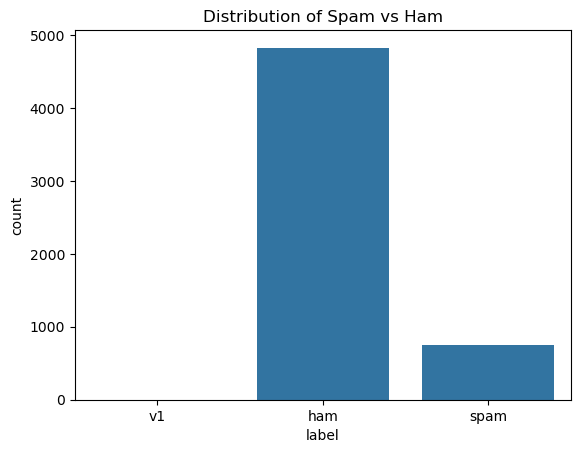

In [13]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham')
plt.show()

In [16]:
df['clean_message'] = df['message'].apply(clean_text)
df.head()

,label,message,clean_message
0,v1,v2,v2
1,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
2,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
4,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say


In [17]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [18]:
vectorizer = TfidfVectorizer()

In [19]:
X = vectorizer.fit_transform(df['clean_message'])

In [20]:
y = df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9641


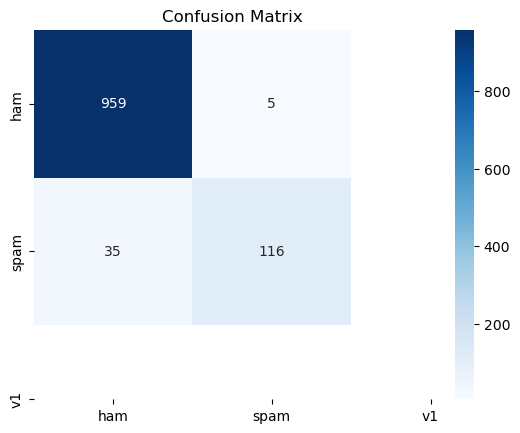

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.show()

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       964
           1       0.96      0.77      0.85       151

    accuracy                           0.96      1115
   macro avg       0.96      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115

